## <span style="color:#3C4048; font-weight: bold; font-size: 18px; font-family: Gill Sans, sans-serif;">Part-1: Unsupervised Learning with SOM</span>

### <span style="color:#3C4048; font-weight: bold; font-size: 18px; font-family: Gill Sans, sans-serif;">About Dataset</span>

<p style="text-align: justify; text-justify: inter-word;">
   <font size=3>
       <b>Dataset</b>: <a href="https://archive.ics.uci.edu/dataset/143/statlog+australian+credit+approval">Australian Credit Approval</a>
   </font>
</p>

<p style="text-align: justify; text-justify: inter-word;">
   <font size=3>
       This file contains credit card applications.  All attribute names and values have been changed to meaningless
       symbols to protect confidentiality of the data.
       This dataset is interesting because there is a good mix of attributes -- continuous, nominal with small numbers
       of values, and nominal(refers to categorical data that doesn't have a numerical order.) with larger numbers of values.  There are also a few missing values.
   </font>
</p>

### <span style="color:#3C4048; font-weight: bold; font-size: 18px; font-family: Gill Sans, sans-serif;">Goal of the Experiment</span>

<p style="text-align: justify; text-justify: inter-word;">
   <font size=3>
       Predicting group of customer who are fradulent. we are going to solve this problem in an unsupervised way.
   </font>
</p>

### <span style="color:#3C4048; font-weight: bold; font-size: 18px; font-family: Gill Sans, sans-serif;">Required Packages</span>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from minisom import MiniSom

### <span style="color:#3C4048; font-weight: bold; font-size: 18px; font-family: Gill Sans, sans-serif;">Load Dataset</span>

In [2]:
dataset = pd.read_csv("dataset/Credit_Card_Applications.csv")

In [3]:
dataset.head()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


<p style="text-align: justify; text-justify: inter-word;">
   <font size=3>
       <b>Class 0</b>: It represents, no fraud <br>
       <b>Class 1</b>: It represents, fraud
   </font>
</p>

In [4]:
# The values attribute returns the data in array format
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

### <span style="color:#3C4048; font-weight: bold; font-size: 18px; font-family: Gill Sans, sans-serif;">Feature Scaling</span>

In [5]:
sc = MinMaxScaler(feature_range=(0, 1))
X = sc.fit_transform(X)
X

array([[8.42681467e-01, 1.00000000e+00, 1.25263158e-01, ...,
        5.00000000e-01, 5.00000000e-02, 1.21200000e-02],
       [6.96090562e-01, 0.00000000e+00, 1.34135338e-01, ...,
        5.00000000e-01, 8.00000000e-02, 0.00000000e+00],
       [3.88981656e-01, 0.00000000e+00, 2.38045113e-01, ...,
        5.00000000e-01, 1.40000000e-01, 0.00000000e+00],
       ...,
       [4.39420332e-01, 0.00000000e+00, 7.63909774e-02, ...,
        5.00000000e-01, 5.00000000e-02, 0.00000000e+00],
       [8.44034934e-01, 0.00000000e+00, 2.05563910e-01, ...,
        5.00000000e-01, 6.00000000e-02, 1.10000000e-04],
       [1.06907888e-01, 1.00000000e+00, 4.09774436e-01, ...,
        0.00000000e+00, 2.80000000e-01, 0.00000000e+00]], shape=(690, 15))

In [6]:
# Initialize the SOM
som = MiniSom(x=10, y=10,       # This is the grid size which represents num of nodes (10 * 10 = 100)
              input_len=15,     # The dimensionality of the input data. This should match the number of features in your dataset.  
              sigma=1.0,        # The radius of the neighborhood function, which determines the extent of the influence a node has on its neighbors. A larger sigma means a broader area of influence.
              learning_rate=0.5 # The initial learning rate for the training process. It controls how much the weights are adjusted during each training step.
             )

In [7]:
som.random_weights_init(X)
som.train_random(data=X, num_iteration=100, verbose=True)

 [ 100 / 100 ] 100% - 0:00:00 left 
 quantization error: 0.507912963019135


### <span style="color:#3C4048; font-weight: bold; font-size: 18px; font-family: Gill Sans, sans-serif;">Data Visualization</span>

<p style="text-align: justify; text-justify: inter-word; font-size: 15px; text-indent: 50px;">
    We are going to plot all the winning nodes in the two dimentional grid graph. In this graph we are
    primarily going to depicts Mean Interneuron Distance(MID). In simple terms, MID is the mean of
    distances of winning node with its surrounding nodes. The higher MID of the node, it more away
    from its surrounding nodes. Therefore the <b>higher MID</b> node probably an outlier.<br>
    <strong>Note</strong>: More details can be found in appendix(<a href="#Mean-Interneuron-Distance">Mean Interneuron Distance</a>) section of this notebook
</p>

In [8]:
from pylab import bone, pcolor, colorbar, plot, show

In [9]:
# This method give MID of each winning node
som.distance_map()

array([[0.2345897 , 0.40127225, 0.33187587, 0.4301104 , 0.49333233,
        0.58060627, 0.55360175, 0.37435555, 0.47375693, 0.40097166],
       [0.33383248, 0.43835576, 0.50555341, 0.42166694, 0.67466084,
        0.94157142, 0.81909257, 0.68666968, 0.59354177, 0.40934428],
       [0.28847939, 0.56081489, 0.39721616, 0.44648241, 0.55246533,
        0.69639134, 0.71357685, 0.5905239 , 0.728437  , 0.37969264],
       [0.46978038, 0.63449636, 0.52327537, 0.4055069 , 0.4431706 ,
        0.57789964, 0.59519856, 0.77642622, 0.64359578, 0.39310467],
       [0.57461159, 0.78839767, 0.70528056, 0.51677834, 0.49820895,
        0.45522131, 0.64769432, 0.69403155, 0.7701126 , 0.53308809],
       [0.5159211 , 0.7962003 , 0.86149099, 0.69966359, 0.49402074,
        0.47882509, 0.77880813, 0.74598126, 1.        , 0.46370354],
       [0.55194649, 0.77632002, 0.75668553, 0.82356604, 0.53561014,
        0.57744987, 0.57897713, 0.6248694 , 0.68377625, 0.47656557],
       [0.56325806, 0.82570671, 0.8705201

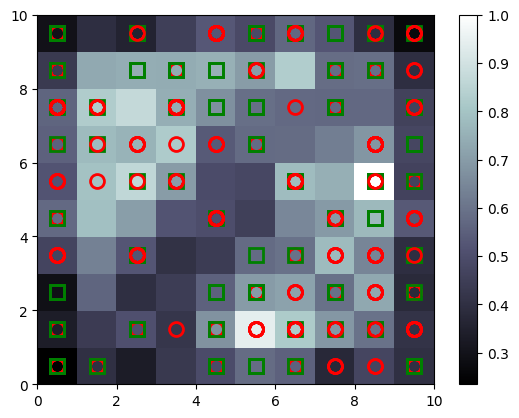

In [10]:
# NOTE:
# The graph might look different each time that you run 'entire notebook', it's because
# random weights the we initize will be different each time.
bone()

# We will get 10 X 10 graph because our array shape is 10 X 10,
# if you are not clear read appendix section of this notebook
pcolor(som.distance_map())

# In the generated graph white color nodes(grid) are having highest MID and dark-blue(grid) has lowest MID
# The white color nodes potentially outlier and possible repesent fradulent customers
colorbar()

# Now we will check each winning node approved credit load or not. For this we are going to use
# output label
markers = ["o", "s"]
color = ["r", "g"]

for index, customer_data in enumerate(X):
    winning_node = som.winner(customer_data)
    plot(
        winning_node[0] + 0.5,  # Represent X co-ordinate and 0.5 to move marker in the center of grid
        winning_node[1] + 0.5,  # Represent Y co-ordinate and 0.5 to move marker in the center of grid
        markers[y[index]],  # If Y is 0, not a fraud and it repesented with "o", For fraudelent it is 1 and "s"
        markeredgecolor=color[y[index]],
        markerfacecolor="None",  # Some color filled inside markers if you remove this one
        markersize=10,
        markeredgewidth=2
    )

### <span style="color:#3C4048; font-weight: bold; font-size: 18px; font-family: Gill Sans, sans-serif;">Finding the frauds</span>

<p style="text-align: justify; text-justify: inter-word;">
    In the above Graph, the wight grids represents potential outliers or fraudulent customers. We are going to use
    <code>som.win_map(data)</code> method to get customers associated with these white grids by looking at graph and grabing
    co-ordinates.
</p>

In [11]:
mappings = som.win_map(X)

In [12]:
# NOTE: You have to update these values by looking at map
frauds = np.concatenate((mappings[(6, 7)], mappings[(7,7)], mappings[(5, 1)]), axis=0)

In [13]:
frauds = sc.inverse_transform(frauds) # converting to original form

In [15]:
frauds

array([[1.5580579e+07, 1.0000000e+00, 4.3250000e+01, 2.5210000e+01,
        2.0000000e+00, 1.1000000e+01, 8.0000000e+00, 2.1000000e-01,
        1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 0.0000000e+00,
        2.0000000e+00, 7.6000000e+02, 9.1000000e+01],
       [1.5571121e+07, 0.0000000e+00, 1.5830000e+01, 5.8500000e-01,
        2.0000000e+00, 8.0000000e+00, 8.0000000e+00, 1.5000000e+00,
        1.0000000e+00, 1.0000000e+00, 2.0000000e+00, 0.0000000e+00,
        2.0000000e+00, 1.0000000e+02, 1.0000000e+00],
       [1.5768600e+07, 0.0000000e+00, 2.2420000e+01, 5.6650000e+00,
        2.0000000e+00, 1.1000000e+01, 4.0000000e+00, 2.5850000e+00,
        1.0000000e+00, 1.0000000e+00, 7.0000000e+00, 0.0000000e+00,
        2.0000000e+00, 1.2900000e+02, 3.2580000e+03],
       [1.5748552e+07, 0.0000000e+00, 3.0670000e+01, 1.2000000e+01,
        2.0000000e+00, 8.0000000e+00, 4.0000000e+00, 2.0000000e+00,
        1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 0.0000000e+00,
        2.0000000e+00,

## <span style="color:#3C4048; font-weight: bold; font-size: 18px; font-family: Gill Sans, sans-serif;">Part-2: Unsupervised Learning to Supervised Deep Learning</span>

<p style="text-align: justify;
          text-justify: inter-word;
          font-size:17px;">
    In this second part, we will use fraud data that we have got in the first part as labels in our
    dataset, and then we will feed this data to our supervised model.
</p>

In [16]:
# Creating features matrix
# We ignoring customer id column and considering labels column
customers = dataset.iloc[:, 1:].values

In [17]:
# Creating dependent variables by creating frauts data from the previous step
is_fraud = np.zeros(len(dataset))

In [18]:
for i in range(len(dataset)):
    if dataset.iloc[i, 0] in frauds:
        is_fraud[i] = 1

In [19]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
customers = sc.fit_transform(customers)
customers

array([[ 0.68873723, -0.80105183,  1.34711063, ..., -0.48835847,
         0.03738039, -0.89530251],
       [-1.45193254, -0.75124044,  0.45054795, ..., -0.13959116,
        -0.19541334, -0.89530251],
       [-1.45193254, -0.16785619, -0.60482292, ...,  0.55794344,
        -0.19541334, -0.89530251],
       ...,
       [-1.45193254, -1.07543661,  0.96114643, ..., -0.48835847,
        -0.19541334,  1.11694091],
       [-1.45193254, -0.35021653,  1.95822062, ..., -0.3721027 ,
        -0.19330052,  1.11694091],
       [ 0.68873723,  0.79628971, -0.94857229, ...,  2.18552419,
        -0.19541334,  1.11694091]], shape=(690, 15))

In [20]:
# Building a model using artificial neural networks
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

In [22]:
# Converting numpy arrays to PyTorch tensors
x_train_tensor = torch.tensor(customers, dtype=torch.float32)

In [26]:
y_train_tensor = torch.tensor(is_fraud, dtype=torch.float32).view(-1, 1)

In [34]:
# Creating dataset and dataloader for batching
train_dataset = TensorDataset(x_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

In [35]:
class ANN(nn.Module):
    def __init__(self):
        super(ANN, self).__init__()
        self.layer1 = nn.Linear(customers.shape[1], 6)
        self.layer2 = nn.Linear(6, 6)
        self.output = nn.Linear(6, 1)
        self.relu = nn.ReLU()
        self.sigmod = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.layer1(x))
        x = self.relu(self.layer2(x))
        x = self.sigmod(self.output(x))
        return x

In [39]:
# Initializing the model, loss function, and optimizer
model = ANN()
criterion = nn.BCELoss()  # Binary Cross Entropy Loss
optimizer = optim.Adam(model.parameters())

In [41]:
# Training loop
epochs = 10
for epoch in range(epochs):
    for batch_X, batch_y in train_loader:
        # Forward pass
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    # Print progress
    with torch.no_grad():
        outputs = model(x_train_tensor)
        predicted = (outputs > 0.5).float()
        accuracy = (predicted == y_train_tensor).float().mean()
        print(f'Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}, Accuracy: {accuracy.item():.4f}')

Epoch 1/25, Loss: 0.6919, Accuracy: 0.4072
Epoch 2/25, Loss: 0.6678, Accuracy: 0.8174
Epoch 3/25, Loss: 0.6401, Accuracy: 0.9551
Epoch 4/25, Loss: 0.5827, Accuracy: 0.9565
Epoch 5/25, Loss: 0.5098, Accuracy: 0.9565
Epoch 6/25, Loss: 0.4547, Accuracy: 0.9565
Epoch 7/25, Loss: 0.4800, Accuracy: 0.9565
Epoch 8/25, Loss: 0.3551, Accuracy: 0.9565
Epoch 9/25, Loss: 0.2811, Accuracy: 0.9565
Epoch 10/25, Loss: 0.2422, Accuracy: 0.9565
Epoch 11/25, Loss: 0.2626, Accuracy: 0.9565
Epoch 12/25, Loss: 0.3189, Accuracy: 0.9565
Epoch 13/25, Loss: 0.2145, Accuracy: 0.9565
Epoch 14/25, Loss: 0.3035, Accuracy: 0.9565
Epoch 15/25, Loss: 0.0965, Accuracy: 0.9565
Epoch 16/25, Loss: 0.1738, Accuracy: 0.9565
Epoch 17/25, Loss: 0.1869, Accuracy: 0.9565
Epoch 18/25, Loss: 0.1474, Accuracy: 0.9565
Epoch 19/25, Loss: 0.2121, Accuracy: 0.9565
Epoch 20/25, Loss: 0.0644, Accuracy: 0.9565
Epoch 21/25, Loss: 0.0401, Accuracy: 0.9565
Epoch 22/25, Loss: 0.0570, Accuracy: 0.9565
Epoch 23/25, Loss: 0.1285, Accuracy: 0.95

In [50]:
# Assuming you have a single sample as a numpy array
sample =  customers[0]  # Note the double brackets to maintain 2D shape

# Convert to tensor
sample_tensor = torch.tensor(sample, dtype=torch.float32)

# Make prediction
model.eval()  # Set model to evaluation mode
with torch.no_grad():  # No need to track gradients
    prediction = model(sample_tensor)
    predicted_class = (prediction > 0.5).float()  # Threshold at 0.5 for binary classification

print(f"Predicted probability: {prediction.item():.4f}")
print(f"Predicted class: {predicted_class.item()}")

Predicted probability: 0.0170
Predicted class: 0.0


In [54]:
# actual ouptuts
is_fraud[0]

np.float64(0.0)

In [66]:
# Assuming you have multiple samples as a numpy array
samples = customers[:600]
# Convert to tensor
samples_tensor = torch.tensor(samples, dtype=torch.float32)

# Make predictions
model.eval()
with torch.no_grad():
    predictions = model(samples_tensor)
    predicted_classes = (predictions > 0.5).float()

# Convert results to numpy if needed
probabilities = predictions.numpy()
classes = predicted_classes.numpy()

print("Probabilities:", probabilities)
print("Classes:", classes)

Probabilities: [[1.69780906e-02]
 [2.10115388e-02]
 [1.60168926e-03]
 [3.90806198e-02]
 [7.67907947e-02]
 [2.81715810e-01]
 [2.03079674e-02]
 [8.73547569e-02]
 [9.76742990e-03]
 [4.41041291e-02]
 [1.29834870e-02]
 [7.39145279e-03]
 [3.07750683e-02]
 [1.16963219e-02]
 [7.83319492e-03]
 [4.25727181e-02]
 [1.49942199e-02]
 [2.64460415e-01]
 [3.49059026e-03]
 [2.70549744e-01]
 [1.77998543e-02]
 [5.38306637e-03]
 [1.68493055e-02]
 [5.17438427e-02]
 [2.89282110e-02]
 [1.67452917e-02]
 [2.98373657e-03]
 [4.52123173e-02]
 [2.60698020e-01]
 [2.65347362e-02]
 [1.57287661e-02]
 [1.62939001e-02]
 [1.11254435e-02]
 [1.45555856e-02]
 [5.98921999e-03]
 [1.85039341e-02]
 [2.52422728e-02]
 [1.40281525e-02]
 [4.79325727e-02]
 [1.94082111e-02]
 [7.56380334e-02]
 [2.13022646e-03]
 [6.81103021e-02]
 [1.62489302e-02]
 [2.10451540e-02]
 [1.08162314e-01]
 [6.48008939e-03]
 [5.45109548e-02]
 [1.93273593e-02]
 [1.05712809e-01]
 [8.12711101e-03]
 [8.67239013e-03]
 [3.39490012e-03]
 [3.60887847e-03]
 [2.08727084e

In [65]:
is_fraud[:100]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])